In [7]:
using CSV

# It is impossible to read the whole file, so we load only a part of it
# for loading 13GB data I would use something like Apache Spark on a cluster
affnist = CSV.File("../data/affnist.csv"; limit=200_000) |> stack

1601×200000 Matrix{Any}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0   0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0   0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0   0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0  0.0
 ⋮           

In [15]:
affnist = convert(Matrix{Float32}, affnist)
X, Y = affnist[1:1600, :], affnist[1601, :]

(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Float32[0.0, 1.0, 7.0, 3.0, 2.0, 9.0, 6.0, 8.0, 4.0, 5.0  …  8.0, 0.0, 7.0, 1.0, 5.0, 9.0, 2.0, 6.0, 3.0, 4.0])

In [17]:
function one_hot_encode(Y_labels, num_classes::Int=10)
    # Ensure Y_labels is treated as a 1D iterable of integers
    labels_vector = vec(Y_labels) 
    N = length(labels_vector)
    Y_ohe = zeros(Float32, num_classes, N)
    for i in 1:N
        label = labels_vector[i]
        row_index = label + 1
        Y_ohe[row_index, i] = 1.0
    end
    
    return Y_ohe
end

Y = convert(Vector{Int}, Y)
Y = one_hot_encode(Y)

10×200000 Matrix{Float32}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0

In [19]:
using Mlyn

X_train, Y_train, X_test, Y_test = train_test_split(X, Y, 0.8)

(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Float32[0.0 0.0 … 1.0 0.0; 1.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 1.0], Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 1.0; 0.0 1.0 … 0.0 0.0])

In [20]:
model = create_model(classification, [
    BlueprintLinear(1600, 256, method_xavier_normal),
    BlueprintBatchNorm1D(n_features=256),
    BlueprintActivation(method_sigmoid),
    
    BlueprintLinear(256, 10, method_xavier_normal),
    BlueprintBatchNorm1D(n_features=10),
    BlueprintActivation(method_sigmoid),
])

Model(Any[Mlyn.Linear(Float32[-0.0616092 -0.011980564 … -0.0272491 -0.038571205; -0.02139772 0.026615888 … -0.022020508 0.021990849; … ; 0.016189618 -0.04736004 … -0.012067781 -0.07142663; 0.00024450396 0.007266737 … -0.039319307 0.04878819], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Matrix{Float32}(undef, 0, 0), Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), Mlyn.BatchNorm1D(Float32[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  … 

In [25]:
optim = OptimizerAdam()
init_adam!(optim, model.layers)
println("Training has started...")
history = train!(model, optim, 15, X_train, Y_train, X_test, Y_test; batch_size=1000, logging=true, log_period=1)

Training has started...
[EPOCH 1] Test loss = 1.81105168268325; Learning loss = 1.883964691676632
[EPOCH 2] Test loss = 1.6738489711806483; Learning loss = 1.7146888591832223
[EPOCH 3] Test loss = 1.561392939904026; Learning loss = 1.580175969130417
[EPOCH 4] Test loss = 1.4599309373318716; Learning loss = 1.4737308935640194
[EPOCH 5] Test loss = 1.389432400586143; Learning loss = 1.3800645284560957
[EPOCH 6] Test loss = 1.318590897731352; Learning loss = 1.3035526693590356
[EPOCH 7] Test loss = 1.2712479691540757; Learning loss = 1.2365067685915037
[EPOCH 8] Test loss = 1.2187531494827635; Learning loss = 1.177802075188512
[EPOCH 9] Test loss = 1.1814907981445157; Learning loss = 1.1249032486422017
[EPOCH 10] Test loss = 1.1421863988379475; Learning loss = 1.0804130729921346
[EPOCH 11] Test loss = 1.1141275356659492; Learning loss = 1.0403143797270686
[EPOCH 12] Test loss = 1.095761374632362; Learning loss = 1.003182744490902
[EPOCH 13] Test loss = 1.0607066515098509; Learning loss = 

15-element Vector{Any}:
 (1.81105168268325, 1.883964691676632)
 (1.6738489711806483, 1.7146888591832223)
 (1.561392939904026, 1.580175969130417)
 (1.4599309373318716, 1.4737308935640194)
 (1.389432400586143, 1.3800645284560957)
 (1.318590897731352, 1.3035526693590356)
 (1.2712479691540757, 1.2365067685915037)
 (1.2187531494827635, 1.177802075188512)
 (1.1814907981445157, 1.1249032486422017)
 (1.1421863988379475, 1.0804130729921346)
 (1.1141275356659492, 1.0403143797270686)
 (1.095761374632362, 1.003182744490902)
 (1.0607066515098509, 0.9691795033648429)
 (1.0385656485683668, 0.9390282732313523)
 (1.022526298557153, 0.9107066930524403)

In [26]:
deep_model = create_model(classification, [
    BlueprintLinear(1600, 512, method_xavier_normal),
    BlueprintBatchNorm1D(n_features=512),
    BlueprintActivation(method_sigmoid),

    BlueprintLinear(512, 256, method_xavier_normal),
    BlueprintBatchNorm1D(n_features=256),
    BlueprintActivation(method_sigmoid),
        
    BlueprintLinear(256, 10, method_xavier_normal),
    BlueprintBatchNorm1D(n_features=10),
    BlueprintActivation(method_sigmoid),
])

Model(Any[Mlyn.Linear(Float32[0.04243985 0.029106345 … -0.023462644 0.028965265; -0.0049989843 -0.008728675 … 0.041396897 0.0006225471; … ; -0.028965803 0.021409927 … 0.0018279746 0.049154826; 0.02705806 0.01328827 … 0.018331124 -0.066907875], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Matrix{Float32}(undef, 0, 0), Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), Mlyn.BatchNorm1D(Float32[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …

In [27]:
optim = OptimizerSGDM()
init_sgdm!(optim, deep_model.layers)
println("Training has started...")
history = train!(deep_model, optim, 25, X_train, Y_train, X_test, Y_test; batch_size=250, logging=true, log_period=1)

Training has started...
[EPOCH 1] Test loss = 2.770373681944375; Learning loss = 3.220062582066313
[EPOCH 2] Test loss = 2.1468359868547204; Learning loss = 2.4295214709591044
[EPOCH 3] Test loss = 1.7438668175621475; Learning loss = 1.905470092052863
[EPOCH 4] Test loss = 1.5618629052427757; Learning loss = 1.6148558509568267
[EPOCH 5] Test loss = 1.459465414371853; Learning loss = 1.4147296756505146
[EPOCH 6] Test loss = 1.2303781300106518; Learning loss = 1.2792144203506859
[EPOCH 7] Test loss = 1.1939841099063535; Learning loss = 1.1642196240131406
[EPOCH 8] Test loss = 1.1421238910113762; Learning loss = 1.0818074270843705
[EPOCH 9] Test loss = 1.058413866647621; Learning loss = 1.011959323599153
[EPOCH 10] Test loss = 1.0303117342593011; Learning loss = 0.9421322255775703
[EPOCH 11] Test loss = 0.972620701750433; Learning loss = 0.8871943099358941
[EPOCH 12] Test loss = 0.9416038479547755; Learning loss = 0.8409665443815412
[EPOCH 13] Test loss = 0.9252226941507743; Learning loss

25-element Vector{Any}:
 (2.770373681944375, 3.220062582066313)
 (2.1468359868547204, 2.4295214709591044)
 (1.7438668175621475, 1.905470092052863)
 (1.5618629052427757, 1.6148558509568267)
 (1.459465414371853, 1.4147296756505146)
 (1.2303781300106518, 1.2792144203506859)
 (1.1939841099063535, 1.1642196240131406)
 (1.1421238910113762, 1.0818074270843705)
 (1.058413866647621, 1.011959323599153)
 (1.0303117342593011, 0.9421322255775703)
 (0.972620701750433, 0.8871943099358941)
 (0.9416038479547755, 0.8409665443815412)
 (0.9252226941507743, 0.7992321232179272)
 (0.8930608459407444, 0.7592911931168846)
 (0.8754093379377417, 0.7249141796108545)
 (0.8868112221806217, 0.6909169696556645)
 (0.8580718757003062, 0.6628110727271264)
 (0.8512993326040811, 0.6382984819713877)
 (0.8638513531686647, 0.6084242019919943)
 (0.8245338660231417, 0.5877344701660071)
 (0.8184238702511869, 0.5632001532791124)
 (0.8136287824947683, 0.539164354239019)
 (0.8457468309384505, 0.5142203095960398)
 (0.81026843100529

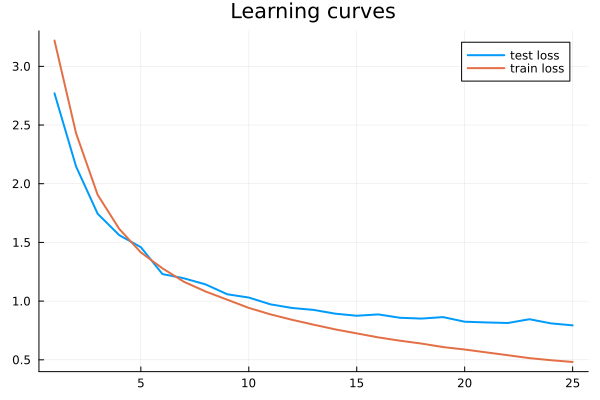

In [28]:
history_plot(history)